## Course: INF 2178 - Experimental Design For Data Science
## Name: Saad Umar
## Instructor: Shion Guha
## Program: Master of Information
## University of Toronto

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import levene

In [4]:
# Read in the dataset
df = pd.read_excel("INF2178_A2_data.xlsx")
df

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1059,14492,The Neighbourhood Group Downsview Child Care,Non Profit Agency,2829 KEELE ST,M3M 2G7,6,Public Elementary School,Downsview Public School,0,0,0,52,60,112,Y,Y
1059,1060,14496,Lawrence Park School,Non Profit Agency,2180 BAYVIEW AVE,M4N 3K7,15,Other,NaN,0,25,35,0,0,60,N,N
1060,1061,14497,The Munchkin Manor Daycare & Early Learning Ce...,Non Profit Agency,525 BLOOR ST E,M4W 1J1,13,Other,Place Of Worship,0,25,24,0,0,49,N,N
1061,1062,14501,Columbus Early Learning Centres - Regina Mundi,Non Profit Agency,60 PLAYFAIR AVE,M6B 2P9,8,Catholic Elementary School,Regina Mundi Catholic School,0,0,0,26,30,56,Y,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


In [6]:
# Distinct values
df.nunique()

_id            1063
LOC_ID         1063
LOC_NAME       1058
AUSPICE           3
ADDRESS        1032
PCODE           998
ward             25
bldg_type        30
BLDGNAME        691
IGSPACE          12
TGSPACE          40
PGSPACE          64
KGSPACE          40
SGSPACE          53
TOTSPACE        188
subsidy           2
cwelcc_flag       2
dtype: int64

In [7]:
df.describe()

,_id,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,532.000000,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,307.005972,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,266.500000,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,532.000000,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,797.500000,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,1063.000000,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


## EDA

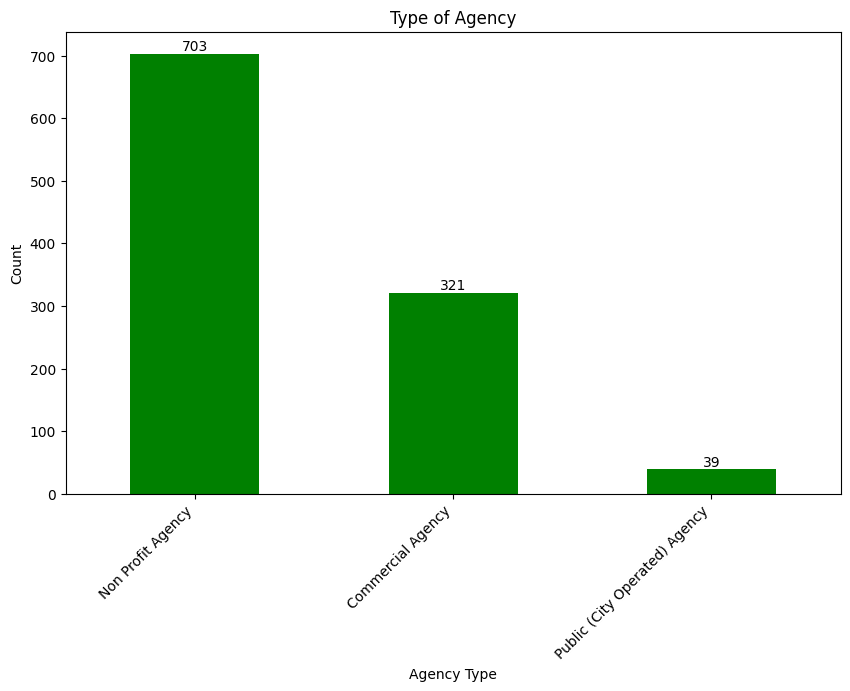

In [9]:
# Setting the size of the figure
plt.figure(figsize = (10,6))

# Get the counts of unique values in the 'AUSPICE' column, and selecting the top 3
capacityType = df['AUSPICE'].value_counts().nlargest(3)

# Plot a bar chart with green color
capacityType.plot(kind='bar', color='green')

# Setting titles and labels
plt.title('Type of Agency')
plt.xlabel('Agency Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add text labels on top of each bar to display the count
for index, value in enumerate(capacityType):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
plt.show()

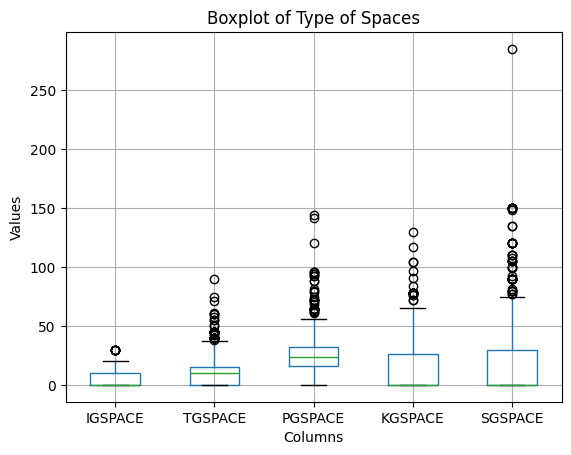

In [10]:
# Create boxplots
df.boxplot(column=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])

# Set labels and title
plt.title('Boxplot of Type of Spaces')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

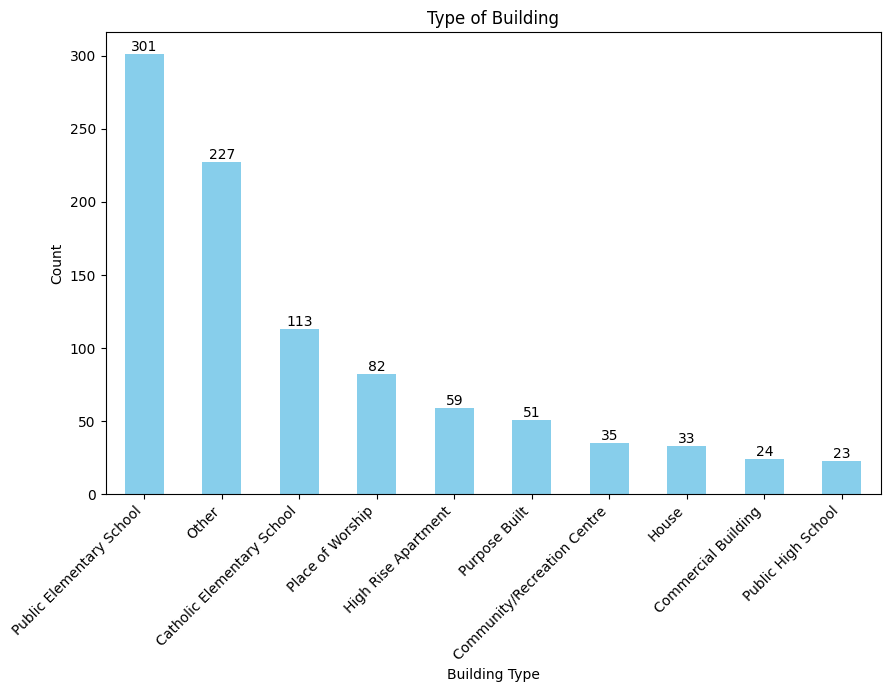

In [11]:
# Set the size of the figure
plt.figure(figsize = (10,6))

# Get the counts of unique values in the 'bldg_type' column, and select the top 10
capacityType = df['bldg_type'].value_counts().nlargest(10)

# Plot a bar chart with sky blue color
capacityType.plot(kind='bar', color='skyblue')

# Setting titles and labels
plt.title('Type of Building')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adding text labels on top of each bar to display the count
for index, value in enumerate(capacityType):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
plt.show()

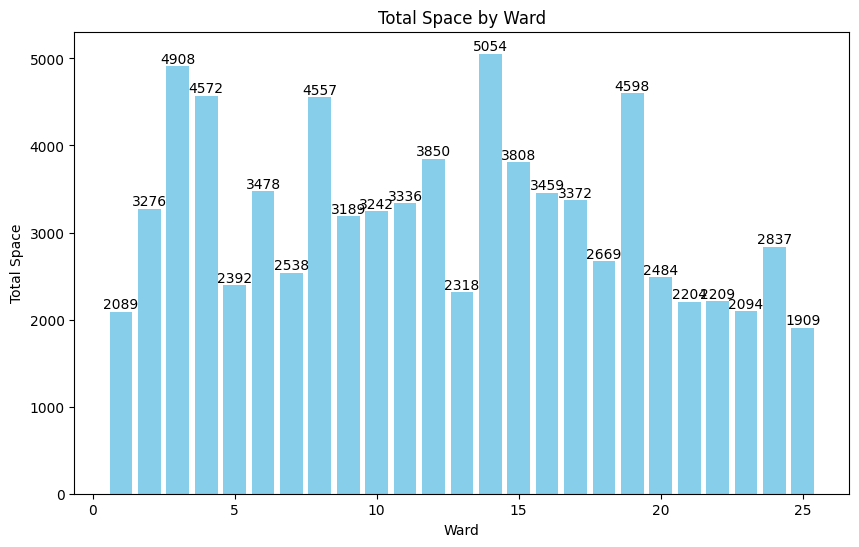

In [12]:
# Bargraph for Total Space for each Ward Code

# Sum of Total space for each Ward
total_ward = df.groupby("ward")["TOTSPACE"].sum().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(total_ward["ward"], total_ward["TOTSPACE"], color="skyblue")
plt.title("Total Space by Ward")
plt.xlabel("Ward")
plt.ylabel("Total Space")

# Add numbers at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha="center", va="bottom")

# Show the plot
plt.show()

In the next few steps, I am creating a new continous column, called "totalCapacity", this column will group the child care centers which have the same location name ("LOC_NAME") and sum up the total space and display it in the 'totalCapacity' Column. 

In [14]:
# Grouping the child care center's by the location name ('LOC_NAME') column
groups = df.groupby('LOC_NAME')

# Print groups with the same value
for value, group in groups:
    if len(group) > 1:
        print(f"Values in 'LOC_NAME' column with the same value {value}: {list(group.index)}")

Values in 'LOC_NAME' column with the same value Atelier Kids Inc.: [952, 1005]
Values in 'LOC_NAME' column with the same value Blue Bell Academy Inc.: [859, 1025]
Values in 'LOC_NAME' column with the same value Bumble Bee Academy: [888, 997]
Values in 'LOC_NAME' column with the same value Kinder College Early Learning Centre: [698, 1030]
Values in 'LOC_NAME' column with the same value Westside Montessori School: [682, 1006]


In [15]:
df1 = df

In [16]:
# Use the function to add the 'totalCapacity' column
df1['totalCapacity'] = df.groupby('LOC_NAME')['TOTSPACE'].transform('sum')

# Print the resulting DataFrame
df1.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,totalCapacity
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y,164
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y,83
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y,102
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y,65
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y,26


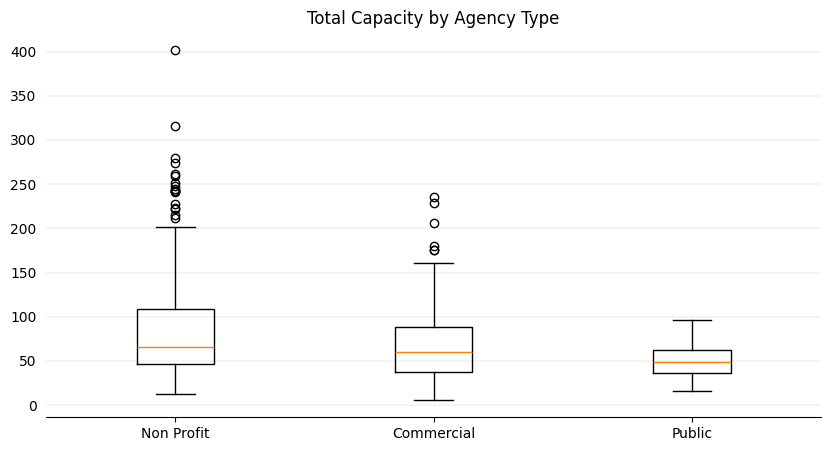

In [17]:
# Extract the categories from the Auspice column to see distribution
auspice_NonProfit_totSpace = df1[df1['AUSPICE'] == 'Non Profit Agency']['totalCapacity']
auspice_Commercial_totSpace = df1[df1['AUSPICE'] == 'Commercial Agency']['totalCapacity']
auspice_Public_totSpace = df1[df1['AUSPICE'] == 'Public (City Operated) Agency']['totalCapacity']

# Merge them in one dataset
df_merge = [auspice_NonProfit_totSpace.dropna(), auspice_Commercial_totSpace.dropna(), auspice_Public_totSpace.dropna()]

# Boxplot for different program models
fig, ax = plt.subplots(figsize=(10, 5))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

# Set plot title
ax.set_title('Total Capacity by Agency Type')

labels = ['Non Profit', 'Commercial', 'Public']
ax.boxplot(data = df1, labels = labels, x = df_merge)
plt.show()

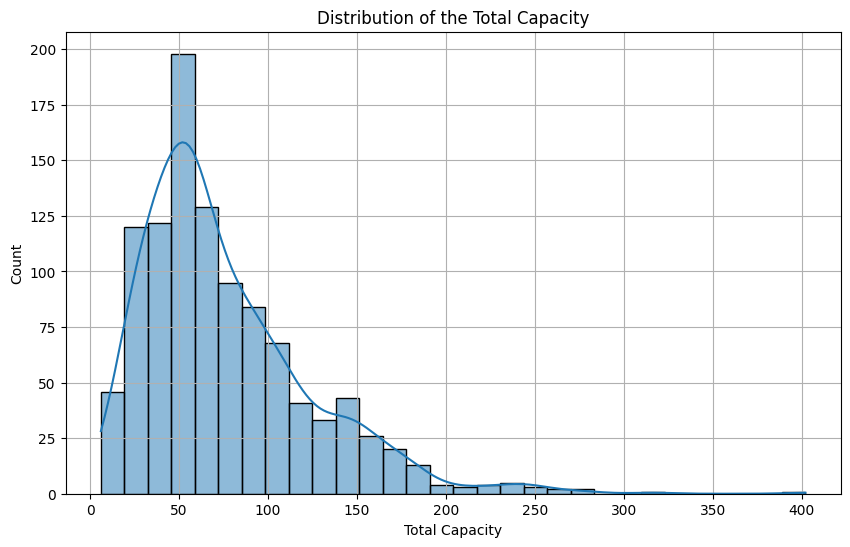

In [18]:
# Distribution of Total Capacity
plt.figure(figsize=(10, 6))
sns.histplot(df1['totalCapacity'], bins=30, kde=True)
plt.title('Distribution of the Total Capacity')
plt.xlabel('Total Capacity')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [19]:
# Count the occurrences of each unique value in the 'subsidy' column
subsidy_counts = df['subsidy'].value_counts()

# Create a new DataFrame from the value counts
subsidy_counts_df = pd.DataFrame(subsidy_counts).reset_index()

# Rename the columns for clarity
subsidy_counts_df.columns = ['Subsidy', 'Count']

# Display the table
subsidy_counts_df


,Subsidy,Count
0,Y,718
1,N,345


In [20]:
# Function to calculate the basic descriptive statistics

def get_summary_statistics(df, column_name):
    
    # Convert the column to numeric (assuming it contains numeric values)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    mean = np.round(np.mean(df[column_name]), 2)
    median = np.round(np.median(df[column_name]), 2)
    min_value = np.round(df[column_name].min(), 2)
    max_value = np.round(df[column_name].max(), 2)
    quartile_1 = np.round(df[column_name].quantile(0.25), 2)
    quartile_3 = np.round(df[column_name].quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [21]:
print('\n\033[1mSummary statistics For "Total Capacity"\033[0m')
get_summary_statistics(df1, 'totalCapacity')


Summary statistics For "Total Capacity"
Min: 6
Mean: 76.22
Max: 402
25th percentile: 43.0
Median: 62.0
75th percentile: 99.0
Interquartile range (IQR): 56.0


In [22]:
# Group by 'auspice' and calculate the mean for 'totalCapacity'
mean_by_auspice = df1.groupby('AUSPICE')['totalCapacity'].mean()

# Print the result
print('\nMean of "totalCapacity" based on "Auspice":\n', mean_by_auspice)


Mean of "totalCapacity" based on "Auspice":
 AUSPICE
Commercial Agency                66.788162
Non Profit Agency                82.103841
Public (City Operated) Agency    47.769231
Name: totalCapacity, dtype: float64


### One - Way ANOVA

In [24]:
columns_to_keep = ['_id','AUSPICE','totalCapacity']
df_melt = df1[columns_to_keep].copy()

# Convert 'totalCapacity' to numeric
df_melt['totalCapacity'] = pd.to_numeric(df_melt['totalCapacity'], errors='coerce')

# reshape the dataframe suitable for statsmodels package
df_melt = pd.melt(df_melt.reset_index(), id_vars=['_id', 'AUSPICE'], value_vars=['totalCapacity'])

# replace column names
df_melt.columns = ['_id', 'AUSPICE', 'variable','totalCapacity']

# Drop the 'variable' column
df_melt = df_melt.drop('variable', axis=1)

# Convert 'AUSPICE' to categorical
df_melt['AUSPICE'] = pd.Categorical(df_melt['AUSPICE'])

df_melt.head()

,_id,AUSPICE,totalCapacity
0,1,Non Profit Agency,164
1,2,Non Profit Agency,83
2,3,Non Profit Agency,102
3,4,Non Profit Agency,65
4,5,Non Profit Agency,26


In [25]:
# Ordinary Least Squares (OLS) model
# Fitting a linear regression model where 'totalCapacity' is the dependent variable,
# and 'AUSPICE' is a categorical independent variable

model = ols('totalCapacity ~ C(AUSPICE)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.446199e+04,2.0,18.933069,8.335502e-09
Residual,2.364374e+06,1060.0,NaN,NaN


In [26]:
# Performing the anova analysis
res = stat()
res.anova_stat(df=df_melt, res_var='totalCapacity', anova_model='totalCapacity ~ AUSPICE')

# Round or replace p-values
res.anova_summary["PR(>F)"] = res.anova_summary["PR(>F)"].apply(lambda x: "<0.001" if x < 0.001 else round(x, 3))

# Round other columns in the summary table to 2
res.anova_summary = res.anova_summary.round(2)
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
AUSPICE,2.0,84461.99,42231.00,18.93,<0.001
Residual,1060.0,2364373.94,2230.54,NaN,NaN


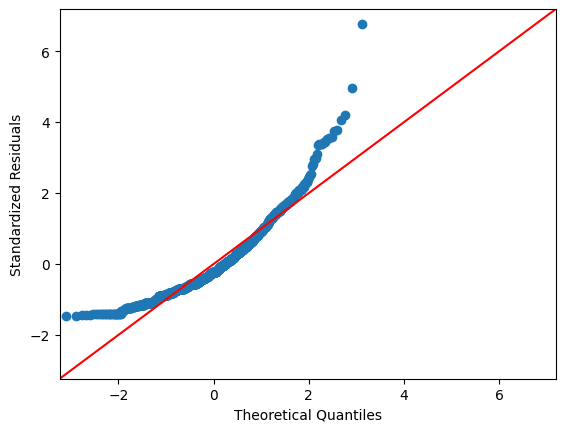

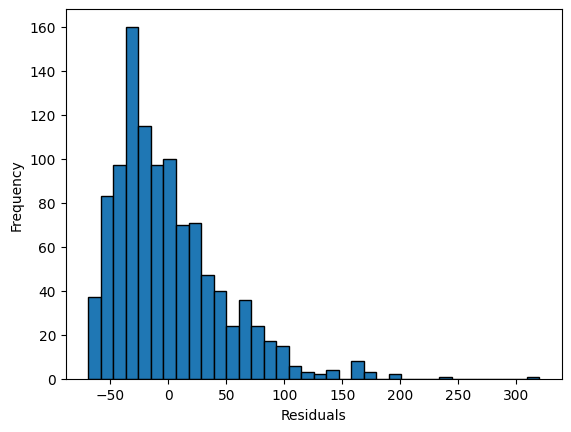

In [27]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [28]:
# assumption 1: Shapiro-Wilk test for normality of residuals
w, pvalue = stats.shapiro(model.resid)

# DataFrame to display the results
result_df = pd.DataFrame({
    'Test Statistic': [round(w,3)],
    'p-value': ['<0.001' if pvalue < 0.001 else round(pvalue, 3)]
})

# Display the DataFrame
print("\nShapiro-Wilk test for normality:")
result_df


Shapiro-Wilk test for normality:


,Test Statistic,p-value
0,0.903,<0.001


In [29]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='totalCapacity', xfac_var='AUSPICE')
res.levene_summary['Value'] = res.levene_summary['Value'].apply(lambda x: '< 0.001' if float(x) == 0.0 else f'{float(x):.3f}')
res.levene_summary

,Parameter,Value
0,Test statistics (W),15.797
1,Degrees of freedom (Df),2.000
2,p value,< 0.001


In [30]:
# Apply post hoc test using Tukey's HSD
res = pairwise_tukeyhsd(df_melt['totalCapacity'], df_melt['AUSPICE'])
auspice_posthoc_summary = pd.DataFrame(data=res._results_table.data[1:], columns=res._results_table.data[0])

# Replace 0 p-adj with "< 0.001"
auspice_posthoc_summary['p-adj'] = auspice_posthoc_summary['p-adj'].apply(lambda x: '< 0.001' if float(x) == 0.0 else f'{float(x):.3f}')

# Display the result
auspice_posthoc_summary.round(2)

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Commercial Agency,Non Profit Agency,15.32,< 0.001,7.85,22.78,True
1,Commercial Agency,Public (City Operated) Agency,-19.02,0.047,-37.82,-0.22,True
2,Non Profit Agency,Public (City Operated) Agency,-34.33,< 0.001,-52.57,-16.10,True


### Two Way Anova (Auspice and Ward)

I am only Comparing specific Wards, namely, Ward number: 3, 8, 25

In [33]:
df_anova_Melt = df1
df_anova_Melt.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,totalCapacity
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y,164
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y,83
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y,102
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y,65
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y,26


In [34]:
# Filter rows for wards 3, 8, and 25
selected_wards = [3, 8, 25]
df_anova_Melt = df_anova_Melt[df_anova_Melt['ward'].isin(selected_wards)]
df_anova_Melt.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,totalCapacity
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y,164
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y,83
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y,102
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y,153
10,11,1044,Alderwood Action After School,Non Profit Agency,544 HORNER AVE,M8W 2C2,3,Public Elementary School,Sir Adam Beck School,0,15,32,52,90,189,Y,Y,189


In [35]:
df_anova_Melt = pd.melt(df_anova_Melt, id_vars=['AUSPICE', 'ward'], value_vars=['totalCapacity'])
df_anova_Melt.columns = ['AUSPICE', 'ward', 'variable', 'totalCapacity']

# Drop the 'variable' column
df_anova_Melt = df_anova_Melt.drop('variable', axis=1)
df_anova_Melt.head()

,AUSPICE,ward,totalCapacity
0,Non Profit Agency,3,164
1,Non Profit Agency,8,83
2,Non Profit Agency,25,102
3,Non Profit Agency,8,153
4,Non Profit Agency,3,189


([0, 1, 2],
 [Text(0, 0, 'Non Profit Agency'),
  Text(1, 0, 'Commercial Agency'),
  Text(2, 0, 'Public (City Operated) Agency')])

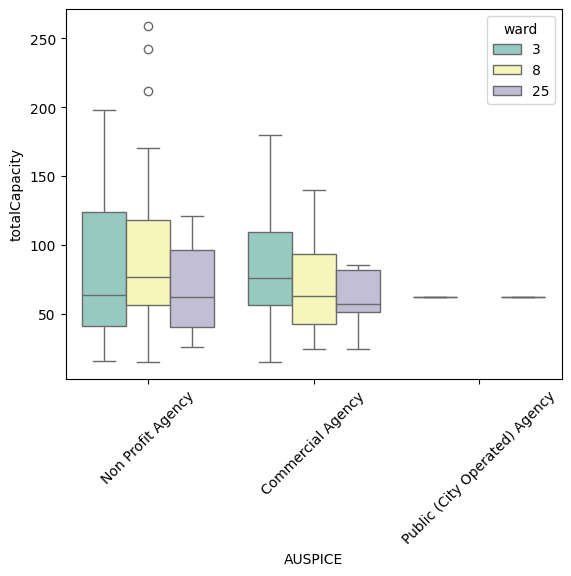

In [36]:
sns.boxplot(x="AUSPICE", y="totalCapacity", hue="ward",data=df_anova_Melt, palette="Set3")
plt.xticks(rotation=45)

In [37]:
model1=ols('totalCapacity ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)', data=df_anova_Melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.446199e+04,2.0,18.933069,8.335502e-09
Residual,2.364374e+06,1060.0,NaN,NaN


In [38]:
# ANOVA table
res = stat()
res.anova_stat(df=df_anova_Melt, res_var='totalCapacity', anova_model='totalCapacity ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)')
res.anova_summary

# Round or replace p-values
res.anova_summary["PR(>F)"] = res.anova_summary["PR(>F)"].apply(lambda x: "<0.01" if x < 0.01 else round(x, 3))

# Round other columns in the summary table
res.anova_summary = res.anova_summary.round(3)
res.anova_summary

/home/bd3bf02e-f078-456c-afd6-77bca19d1162/.local/lib/python3.11/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/home/bd3bf02e-f078-456c-afd6-77bca19d1162/.local/lib/python3.11/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/home/bd3bf02e-f078-456c-afd6-77bca19d1162/.local/lib/python3.11/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,11834.039,5917.020,2.657,0.105
C(ward),2.0,8224.224,4112.112,1.847,0.176
C(AUSPICE):C(ward),4.0,4120.147,1030.037,0.463,0.709
Residual,135.0,300600.021,2226.667,NaN,NaN


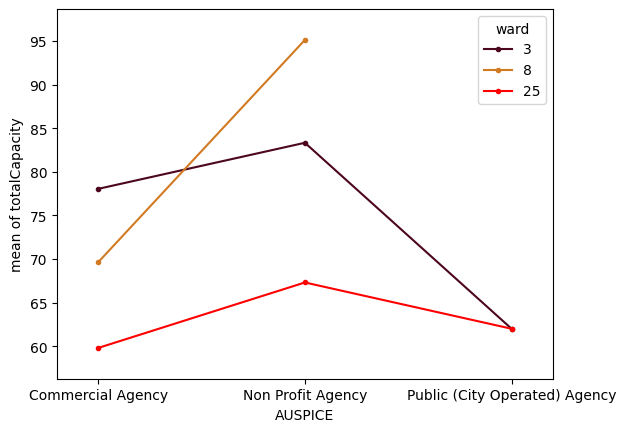

In [39]:
# Interaction plot for Two-Way Anova
fig = interaction_plot(x=df_anova_Melt['AUSPICE'],trace=df_anova_Melt['ward'],response=df_anova_Melt['totalCapacity'],colors=['#4c061d','#d17a22','red'])
plt.show()

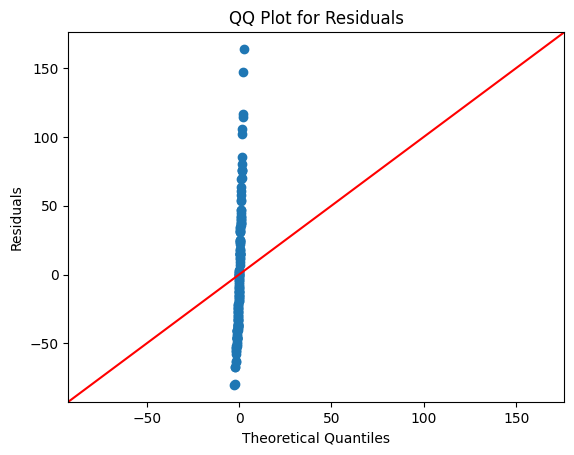

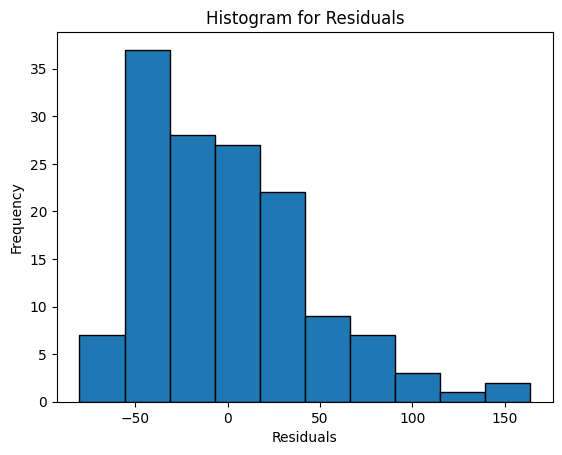

In [40]:
# Assumptions
model1 = ols('totalCapacity ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)', data=df_anova_Melt).fit()

# assumption 1: model.resid is the residuals obtained from ANOVA
sm.qqplot(model1.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("QQ Plot for Residuals")
plt.show()

# histogram
plt.hist(model1.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram for Residuals")
plt.show()

In [41]:
# assumption 1: Shapiro-Wilk test for normality of residuals
w, pvalue = stats.shapiro(model1.resid)

# DataFrame to display the results
result_df = pd.DataFrame({
    'Test Statistic': [round(w,3)],
    'p-value': ['<0.001' if pvalue < 0.001 else round(pvalue, 3)]
})

# Display the DataFrame
print("\nShapiro-Wilk test for normality:")
result_df


Shapiro-Wilk test for normality:


,Test Statistic,p-value
0,0.947,<0.001


In [42]:
# Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed

# Define a function to apply the levene test for two way anova
def levene_test_two_way_anova(df, factor1, factor2, response):
    # List to store results
    levene_results = []
    # Unique levels of the factors
    levels_factor1 = df[factor1].unique()
    levels_factor2 = df[factor2].unique()
    
    # Iterate over combinations of levels of the factors
    for level1 in levels_factor1:
        for level2 in levels_factor2:
            # Select data for the current combination of levels
            subset = df[(df[factor1] == level1) & (df[factor2] == level2)]
            
            # Check if subset is not empty before performing Levene's test
            if not subset.empty:
                # Perform Levene's test
                stat, p_value = levene(subset[response], subset.index)
                # Round the values
                stat_rounded = round(stat, 2)
                p_value_rounded = "<0.001" if p_value < 0.001 else round(p_value, 3)
                # Store the results
                levene_results.append([level1, level2, stat_rounded, p_value_rounded])
            else:
                # Handle the case when the subset is empty
                levene_results.append([level1, level2, np.nan, np.nan])
    
    # Create DataFrame from results
    levene_df = pd.DataFrame(levene_results, columns=[factor1, factor2, "Levene_statistic", "p_value"])
    return levene_df

In [43]:
# Perform Levene's test for the factors "Auspice" and "ward"
levene_result_two_way_1 = levene_test_two_way_anova(df_anova_Melt, "AUSPICE", "ward", "totalCapacity")

# Display the results
levene_result_two_way_1

/home/bd3bf02e-f078-456c-afd6-77bca19d1162/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:3310: RuntimeWarning: divide by zero encountered in scalar divide
  W = numer / denom
/home/bd3bf02e-f078-456c-afd6-77bca19d1162/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:3310: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


,AUSPICE,ward,Levene_statistic,p_value
0,Non Profit Agency,3,4.30,0.042
1,Non Profit Agency,8,0.05,0.824
2,Non Profit Agency,25,5.26,0.027
3,Commercial Agency,3,0.20,0.654
4,Commercial Agency,8,0.01,0.93
5,Commercial Agency,25,1.80,0.216
6,Public (City Operated) Agency,3,inf,<0.001
7,Public (City Operated) Agency,8,NaN,NaN
8,Public (City Operated) Agency,25,NaN,NaN


In [44]:
# Perform Tukey's HSD post hoc test for 'AUSPICE'
tukey_auspice1 = pairwise_tukeyhsd(df_anova_Melt['totalCapacity'], df_anova_Melt['AUSPICE'], alpha=0.05)
tukey_auspice_summary1 = pd.DataFrame(data=tukey_auspice1._results_table.data[1:], columns=tukey_auspice1._results_table.data[0])

# Format 'p-adj' column to show '< 0.001' if p-adj is less than 0.001, otherwise round to 3 decimal places
tukey_auspice_summary1['p-adj'] = tukey_auspice_summary1['p-adj'].apply(lambda x: '< 0.001' if float(x) < 0.001 else round(float(x), 3))

# Round 'meandiff', 'lower', and 'upper' columns to 3 decimal places
numeric_columns_to_round = ['meandiff', 'lower', 'upper']
tukey_auspice_summary1[numeric_columns_to_round] = tukey_auspice_summary1[numeric_columns_to_round].round(2)

print("\nTukey's HSD Post Hoc Test for AUSPICE:")
tukey_auspice_summary1


Tukey's HSD Post Hoc Test for AUSPICE:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Commercial Agency,Non Profit Agency,10.76,0.406,-9.08,30.61,False
1,Commercial Agency,Public (City Operated) Agency,-10.92,0.920,-77.53,55.69,False
2,Non Profit Agency,Public (City Operated) Agency,-21.68,0.715,-87.40,44.04,False


In [45]:
# Perform Tukey's HSD post hoc test for 'subsidy'
tukey_ward = pairwise_tukeyhsd(df_anova_Melt['totalCapacity'], df_anova_Melt['ward'], alpha=0.05)
tukey_ward_summary = pd.DataFrame(data=tukey_ward._results_table.data[1:], columns=tukey_ward._results_table.data[0])

# Format 'p-adj' column to show '< 0.001' if p-adj is less than 0.001, otherwise round to 2 decimal places
tukey_ward_summary['p-adj'] = tukey_ward_summary['p-adj'].apply(lambda x: '< 0.001' if float(x) < 0.001 else round(float(x), 3))

# Round 'meandiff', 'lower', and 'upper' columns to 2 decimal places
numeric_columns_to_round = ['meandiff', 'lower', 'upper']
tukey_ward_summary[numeric_columns_to_round] = tukey_ward_summary[numeric_columns_to_round].round(2)

print("\nTukey's HSD Post Hoc Test for ward:")
tukey_ward_summary


Tukey's HSD Post Hoc Test for ward:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,3,8,5.52,0.807,-15.41,26.45,False
1,3,25,-14.63,0.355,-39.77,10.51,False
2,8,25,-20.15,0.156,-45.90,5.59,False


In [46]:
# Posthoc Test
res = pairwise_tukeyhsd(df_anova_Melt['totalCapacity'], groups= '(' + df_anova_Melt['AUSPICE'].astype(str) + ',' + df_anova_Melt['ward'].astype(str) + ')', alpha=0.05)

# Convert the results to a DataFrame
twoWay_posthoc_summary1 = pd.DataFrame(data=res._results_table.data[1:], columns=res._results_table.data[0])

# Format 'p-adj' column to show '< 0.001' if p-adj is less than 0.001, otherwise round to 2 decimal places
twoWay_posthoc_summary1['p-adj'] = twoWay_posthoc_summary1['p-adj'].apply(lambda x: '< 0.001' if float(x) < 0.001 else round(float(x), 3))

# Round 'meandiff', 'lower', and 'upper' columns to 2 decimal places
numeric_columns_to_round = ['meandiff', 'lower', 'upper']
twoWay_posthoc_summary1[numeric_columns_to_round] = twoWay_posthoc_summary1[numeric_columns_to_round].round(2)

# Display Tukey's HSD post hoc test results
print("\nTukey's HSD Post Hoc Test:")
twoWay_posthoc_summary1


Tukey's HSD Post Hoc Test:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,"(Commercial Agency,25)","(Commercial Agency,3)",18.24,0.993,-52.94,89.42,False
1,"(Commercial Agency,25)","(Commercial Agency,8)",9.83,1.000,-63.20,82.86,False
2,"(Commercial Agency,25)","(Non Profit Agency,25)",7.50,1.000,-64.19,79.20,False
3,"(Commercial Agency,25)","(Non Profit Agency,3)",23.52,0.967,-46.07,93.11,False
4,"(Commercial Agency,25)","(Non Profit Agency,8)",35.32,0.771,-34.27,104.91,False
5,"(Commercial Agency,25)","(Public (City Operated) Agency,25)",2.20,1.000,-156.96,161.36,False
6,"(Commercial Agency,25)","(Public (City Operated) Agency,3)",2.20,1.000,-119.36,123.76,False
7,"(Commercial Agency,3)","(Commercial Agency,8)",-8.41,0.999,-52.63,35.81,False
8,"(Commercial Agency,3)","(Non Profit Agency,25)",-10.74,0.994,-52.71,31.24,False
9,"(Commercial Agency,3)","(Non Profit Agency,3)",5.28,1.000,-33.00,43.56,False


### Two Way Anova (Auspice and Subsidy)

In [48]:
d = df1
d.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,totalCapacity
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y,164
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y,83
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y,102
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y,65
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y,26


In [49]:
d_melt = pd.melt(d, id_vars=['AUSPICE', 'subsidy'], value_vars=['totalCapacity'])
d_melt.columns = ['AUSPICE', 'subsidy', 'variable', 'totalCapacity']
# Drop the 'variable' column
d_melt = d_melt.drop('variable', axis=1)
d_melt.head()

,AUSPICE,subsidy,totalCapacity
0,Non Profit Agency,Y,164
1,Non Profit Agency,Y,83
2,Non Profit Agency,Y,102
3,Non Profit Agency,Y,65
4,Non Profit Agency,Y,26


([0, 1, 2],
 [Text(0, 0, 'Non Profit Agency'),
  Text(1, 0, 'Commercial Agency'),
  Text(2, 0, 'Public (City Operated) Agency')])

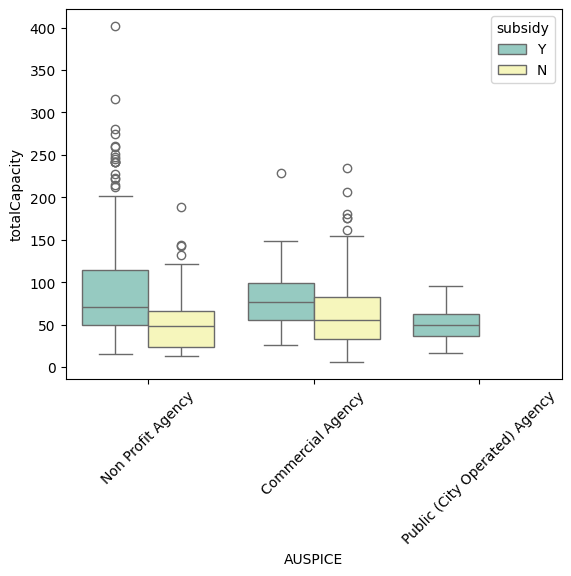

In [50]:
sns.boxplot(x="AUSPICE", y="totalCapacity", hue="subsidy",data=d_melt, palette="Set3")
plt.xticks(rotation=45)

In [51]:
model2=ols('totalCapacity ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.446199e+04,2.0,18.933069,8.335502e-09
Residual,2.364374e+06,1060.0,NaN,NaN


In [52]:
# ANOVA table
res = stat()
res.anova_stat(df=d_melt, res_var='totalCapacity', anova_model='totalCapacity ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

# Round or replace p-values
res.anova_summary["PR(>F)"] = res.anova_summary["PR(>F)"].apply(lambda x: "<0.01" if x < 0.01 else round(x, 3))

# Round other columns in the summary table
res.anova_summary = res.anova_summary.round(3)
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,5816.925,2908.462,1.375,0.253
C(subsidy),1.0,78573.291,78573.291,37.154,<0.01
C(AUSPICE):C(subsidy),2.0,60925.858,30462.929,14.405,<0.01
Residual,1058.0,2237453.593,2114.795,NaN,NaN


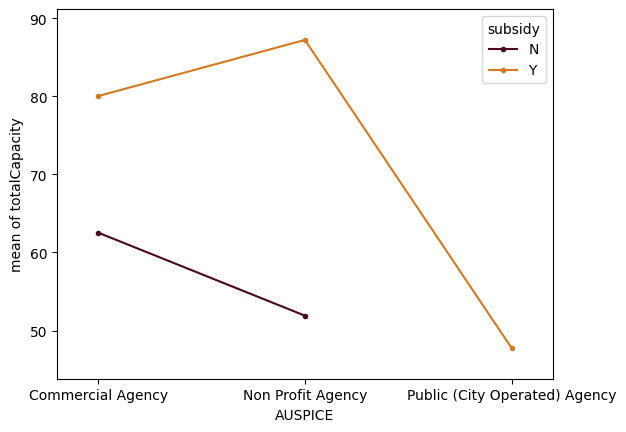

In [53]:
# Interaction plot for Two-Way Anova
fig = interaction_plot(x=d_melt['AUSPICE'],trace=d_melt['subsidy'],response=d_melt['totalCapacity'],colors=['#4c061d','#d17a22'])
plt.show()

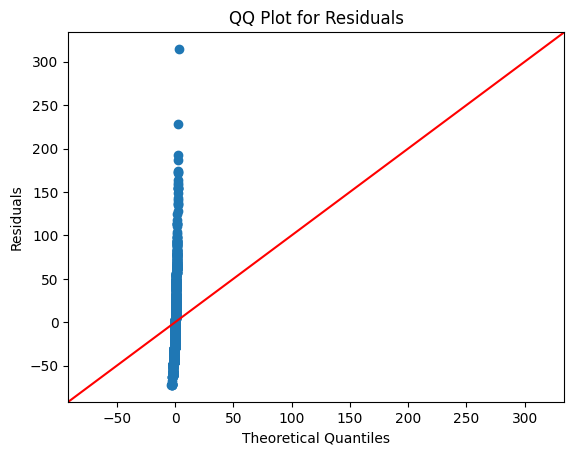

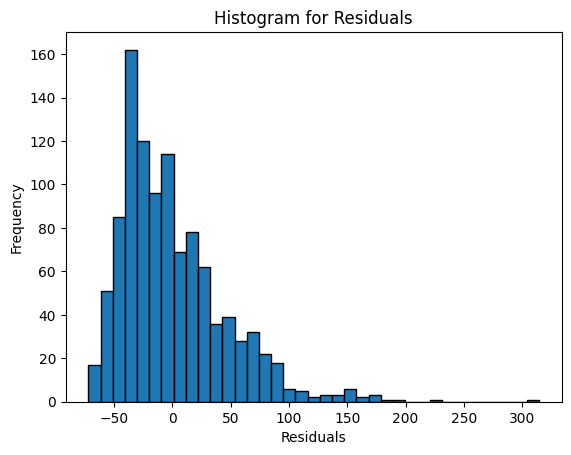

In [54]:
# Assumptions
model2 = ols('totalCapacity ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=d_melt).fit()

# assumption 1: model.resid is the residuals obtained from ANOVA
sm.qqplot(model2.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residuals")
plt.title("QQ Plot for Residuals")
plt.show()

# histogram
plt.hist(model2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram for Residuals")
plt.show()

In [55]:
# assumption 1: Shapiro-Wilk test for normality of residuals
w, pvalue = stats.shapiro(model2.resid)

# DataFrame to display the results
result_df = pd.DataFrame({
    'Test Statistic': [round(w,3)],
    'p-value': ['<0.001' if pvalue < 0.001 else round(pvalue, 3)]
})

# Display the DataFrame
print("\nShapiro-Wilk test for normality:")
result_df



Shapiro-Wilk test for normality:


,Test Statistic,p-value
0,0.903,<0.001


In [56]:
# Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed

# Define a function to apply the levene test for two way anova
def levene_test_two_way_anova(df, factor1, factor2, response):
    # List to store results
    levene_results = []
    # Unique levels of the factors
    levels_factor1 = df[factor1].unique()
    levels_factor2 = df[factor2].unique()
    
    # Iterate over combinations of levels of the factors
    for level1 in levels_factor1:
        for level2 in levels_factor2:
            # Select data for the current combination of levels
            subset = df[(df[factor1] == level1) & (df[factor2] == level2)]
            
            # Check if subset is not empty before performing Levene's test
            if not subset.empty:
                # Perform Levene's test
                stat, p_value = levene(subset[response], subset.index)
                # Round the values
                stat_rounded = round(stat, 2)
                p_value_rounded = "<0.001" if p_value < 0.001 else round(p_value, 3)
                # Store the results
                levene_results.append([level1, level2, stat_rounded, p_value_rounded])
            else:
                # Handle the case when the subset is empty
                levene_results.append([level1, level2, np.nan, np.nan])
    
    # Create DataFrame from results
    levene_df = pd.DataFrame(levene_results, columns=[factor1, factor2, "Levene_statistic", "p_value"])
    return levene_df

In [57]:
# Perform Levene's test for the factors "Auspice" and "Subsidy"
levene_result_two_way = levene_test_two_way_anova(d_melt, "AUSPICE", "subsidy", "totalCapacity")

# Display the results
levene_result_two_way

,AUSPICE,subsidy,Levene_statistic,p_value
0,Non Profit Agency,Y,972.16,<0.001
1,Non Profit Agency,N,281.53,<0.001
2,Commercial Agency,Y,57.55,<0.001
3,Commercial Agency,N,317.46,<0.001
4,Public (City Operated) Agency,Y,8.58,0.004
5,Public (City Operated) Agency,N,NaN,NaN


In [58]:
# Perform Tukey's HSD post hoc test for 'AUSPICE'
tukey_auspice = pairwise_tukeyhsd(d_melt['totalCapacity'], d_melt['AUSPICE'], alpha=0.05)
tukey_auspice_summary = pd.DataFrame(data=tukey_auspice._results_table.data[1:], columns=tukey_auspice._results_table.data[0])

# Format 'p-adj' column to show '< 0.001' if p-adj is less than 0.001, otherwise round to 3 decimal places
tukey_auspice_summary['p-adj'] = tukey_auspice_summary['p-adj'].apply(lambda x: '< 0.001' if float(x) < 0.001 else round(float(x), 3))

# Round 'meandiff', 'lower', and 'upper' columns to 3 decimal places
numeric_columns_to_round = ['meandiff', 'lower', 'upper']
tukey_auspice_summary[numeric_columns_to_round] = tukey_auspice_summary[numeric_columns_to_round].round(2)

print("\nTukey's HSD Post Hoc Test for AUSPICE:")
tukey_auspice_summary


Tukey's HSD Post Hoc Test for AUSPICE:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Commercial Agency,Non Profit Agency,15.32,< 0.001,7.85,22.78,True
1,Commercial Agency,Public (City Operated) Agency,-19.02,0.047,-37.82,-0.22,True
2,Non Profit Agency,Public (City Operated) Agency,-34.33,< 0.001,-52.57,-16.10,True


In [59]:
# Perform Tukey's HSD post hoc test for 'subsidy'
tukey_subsidy = pairwise_tukeyhsd(d_melt['totalCapacity'], d_melt['subsidy'], alpha=0.05)
tukey_subsidy_summary = pd.DataFrame(data=tukey_subsidy._results_table.data[1:], columns=tukey_subsidy._results_table.data[0])

# Format 'p-adj' column to show '< 0.001' if p-adj is less than 0.001, otherwise round to 2 decimal places
tukey_subsidy_summary['p-adj'] = tukey_subsidy_summary['p-adj'].apply(lambda x: '< 0.001' if float(x) < 0.001 else round(float(x), 3))

# Round 'meandiff', 'lower', and 'upper' columns to 2 decimal places
numeric_columns_to_round = ['meandiff', 'lower', 'upper']
tukey_subsidy_summary[numeric_columns_to_round] = tukey_subsidy_summary[numeric_columns_to_round].round(2)

print("\nTukey's HSD Post Hoc Test for subsidy:")
tukey_subsidy_summary


Tukey's HSD Post Hoc Test for subsidy:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,N,Y,24.91,< 0.001,18.92,30.9,True


In [60]:
# Posthoc Test
res = pairwise_tukeyhsd(d_melt['totalCapacity'], groups= '(' + d_melt['AUSPICE'].astype(str) + ',' + d_melt['subsidy'].astype(str) + ')', alpha=0.05)

# Convert the results to a DataFrame
twoWay_posthoc_summary = pd.DataFrame(data=res._results_table.data[1:], columns=res._results_table.data[0])

# Format 'p-adj' column to show '< 0.001' if p-adj is less than 0.001, otherwise round to 2 decimal places
twoWay_posthoc_summary['p-adj'] = twoWay_posthoc_summary['p-adj'].apply(lambda x: '< 0.001' if float(x) < 0.001 else round(float(x), 3))

# Round 'meandiff', 'lower', and 'upper' columns to 2 decimal places
numeric_columns_to_round = ['meandiff', 'lower', 'upper']
twoWay_posthoc_summary[numeric_columns_to_round] = twoWay_posthoc_summary[numeric_columns_to_round].round(2)

# Display Tukey's HSD post hoc test results
print("\nTukey's HSD Post Hoc Test:")
twoWay_posthoc_summary


Tukey's HSD Post Hoc Test:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,"(Commercial Agency,N)","(Commercial Agency,Y)",17.50,0.029,1.15,33.86,True
1,"(Commercial Agency,N)","(Non Profit Agency,N)",-10.63,0.287,-25.46,4.19,False
2,"(Commercial Agency,N)","(Non Profit Agency,Y)",24.69,< 0.001,15.14,34.25,True
3,"(Commercial Agency,N)","(Public (City Operated) Agency,Y)",-14.77,0.339,-36.44,6.91,False
4,"(Commercial Agency,Y)","(Non Profit Agency,N)",-28.14,< 0.001,-47.04,-9.24,True
5,"(Commercial Agency,Y)","(Non Profit Agency,Y)",7.19,0.692,-7.93,22.31,False
6,"(Commercial Agency,Y)","(Public (City Operated) Agency,Y)",-32.27,0.003,-56.91,-7.63,True
7,"(Non Profit Agency,N)","(Non Profit Agency,Y)",35.33,< 0.001,21.87,48.78,True
8,"(Non Profit Agency,N)","(Public (City Operated) Agency,Y)",-4.13,0.989,-27.79,19.52,False
9,"(Non Profit Agency,Y)","(Public (City Operated) Agency,Y)",-39.46,< 0.001,-60.22,-18.70,True
